In [1]:
%matplotlib inline
import pandas as pd
import altair as alt
import numpy as np
from vega_datasets import data

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

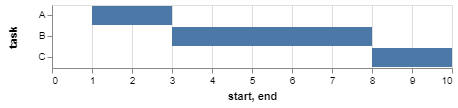

In [2]:
# Gantt Chart

source = pd.DataFrame([
    {"task": "A", "start": 1, "end": 3},
    {"task": "B", "start": 3, "end": 8},
    {"task": "C", "start": 8, "end": 10}
])

alt.Chart(source).mark_bar().encode(
    x='start',
    x2='end',
    y='task'
)

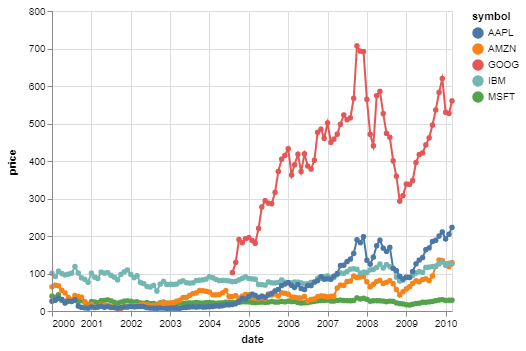

In [3]:
# Multiple Marks
source = data.stocks()

alt.Chart(source).mark_line(point=True).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

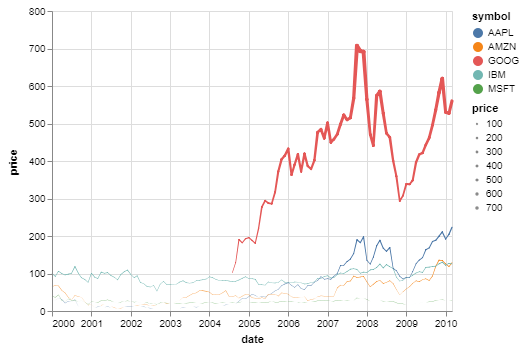

In [4]:
# Trail Markers
alt.Chart(source).mark_trail().encode(
    x='date:T',
    y='price:Q',
    size='price:Q',
    color='symbol:N'
)


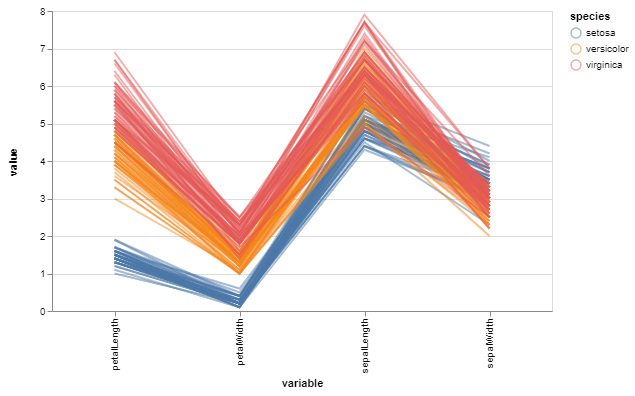

In [5]:
# Parallel Co-ordinates
source = data.iris()
source_transformed = source.reset_index().melt(['species', 'index'])

alt.Chart(source_transformed).mark_line().encode(
    x='variable:N',
    y='value:Q',
    color='species:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

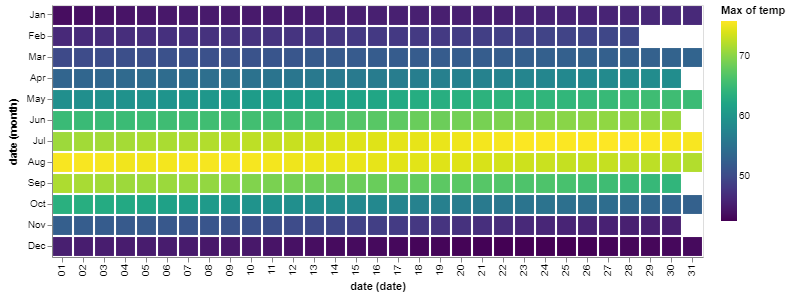

In [6]:
# Weather Heatmap
source = data.seattle_temps.url

alt.Chart(source).mark_rect().encode(
    alt.X('date:O', timeUnit='date') ,
    alt.Y('date:O', timeUnit='month'),
    alt.Color('temp:Q', aggregate='max'),
    tooltip=[alt.Tooltip('date:T', timeUnit='monthdate', title='Date'),
             alt.Tooltip('temp:Q', aggregate='max', title='Max Temp')]
)